## Project title
### Box Office Blueprint: *Data-Driven Insights for Smarter Movie Production*

## Collaborators
1. PAULINE KIMENZU
2. JORAM MUGESA
3. EDINAH OGOTI
4. KELVIN SESERY

## Business Problem
Box Office Blueprint company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

## Main Objective
To analyze current box office performance and identify the types of films that achieve the greatest financial success and audience appeal, providing actionable insights for the company’s new movie studio.

## Specific Objective 
1. Which genres are more likely to get highest critics ratings? 

2. Is there a relationship between the production budget and revenue in worldwide gross? 

3. Which original languages are more popular in screening in box office?


## Business Understanding
Box Office Blueprint is establishing a new movie studio and needs to understand the current market landscape to produce successful films. Analyzing box office performance of existing movies will provide data-driven insights into profitable film types, helping the new studio make informed decisions about genre, budget, and release strategy.

### The primary goal of the  project is:
To provide data-driven insights that will help Box Office Blueprint new film studio identify what types of movies are most likely to succeed at the box office, so the company can make smarter investment and production decisions.
In nutshell:  use data to reduce risk and increase the chances of producing profitable films.

## Data Understanding
The analysis will utilize movie data from various sources to understand factors influencing box office success. This includes information on movie titles, genres, release dates, budgets, and worldwide gross revenue. The data will need to be explored to assess its completeness, accuracy, and suitability for addressing the specific objectives.

##### Understanding the different datasets to address the specific objectives
The project will analyze five distinct datasets and 1 database to analyze movie performance and market trends:
1. bom.movie_gross.csv: This file contains box office data, including domestic and foreign gross revenue for movies.
2. tn.movie_budgets.csv: This dataset provides key financial information for movies, including production budget, domestic gross, and worldwide gross. It's crucial for analyzing profitability.
3. tmdb.movies.csv: This file includes a unique identifier for each movie, as well as genre IDs, popularity scores, and vote averages. The genre IDs will need to be mapped to their corresponding names.
4. rt.movie_info.tsv: This dataset contains descriptive information for each movie, such as genre, director, and synopses from Rotten Tomatoes.
5. rt.reviews.tsv: This file provides critical reviews and ratings for movies, which can be used to assess critical reception.

6. im.db dataset is an SQLite database. The database contains the following tables:
movie_basics – holds general information about movies (movie_id, primary_title, original_title, start_year, genres, runtime_minutes).
directors, writers and known_for  – contains movie_Id and person_Id.
movie_akas – movie_id, ordering, title, region, language, types, attributes, is_original_title.
movie_ratings – movie_id, numvotes and averageratings.
persons – person_id, primary_name, birth_year, death_year and primary_profession.
principals – movie_id, ordering, person_id, category, job and characters.

## Loading Datasets

#### Load and explore the available datasets to understand their content and identify relevant data for the analysis.
Five Datasets are stored in specified CSV file and one is a SQL Database. We will load the data into a pandas DataFrame, display the first few rows, display column information, and display a summary of the DataFrames.

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sqlite3
import statsmodels.api as sm
import re


### Loading bom.movie_gross.csv dataset and displaying summary Information

In [2]:
# Load the data from bom.movie_gross.csv
df1 = pd.read_csv("zippedData/bom.movie_gross.csv.gz",low_memory=False)        

# Display the first 5 rows
print("First 5 rows of the DataFrame (bom.movie_gross.csv):")
display(df1.head())

# Display column names and their data types
print("\nColumn names and data types (bom.movie_gross.csv):")
display(df1.info())

First 5 rows of the DataFrame (bom.movie_gross.csv):


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010



Column names and data types (bom.movie_gross.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


None

### Loading tn.movie_budgets.csv dataset and displaying summary Information

In [3]:
# Load the data from tn.movie_budgets.csv
df2 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")         

# Display the first 5 rows
print("First 5 rows of the DataFrame (tn.movie_budgets.csv):")
display(df2.head())

# Display column names and their data types
print("\nColumn names and data types (tn.movie_budgets.csv):")
display(df2.info())

First 5 rows of the DataFrame (tn.movie_budgets.csv):


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"



Column names and data types (tn.movie_budgets.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


None

### Loading tmdb.movies.csv dataset and displaying summary Information

In [4]:
# Load the data from tmdb.movies.csv
df3 = pd.read_csv("zippedData/tmdb.movies.csv.gz")         

# Display the first 5 rows
print("First 5 rows of the DataFrame (tmdb.movies.csv):")
display(df3.head())

# Display column names and their data types
print("\nColumn names and data types (tmdb.movies.csv):")
display(df3.info())

First 5 rows of the DataFrame (tmdb.movies.csv):


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186



Column names and data types (tmdb.movies.csv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


None

### Loading rt.movie_info.tsv dataset and displaying summary Information

In [5]:
# Load the data from rt.movie_info.tsv
df4 = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep="\t",compression="gzip",encoding="latin-1")      

# Display the first 5 rows
print("First 5 rows of the DataFrame (rt.movie_info.tsv):")
display(df4.head())

# Display column names and their data types
print("\nColumn names and data types (rt.movie_info.tsv):")
display(df4.info())

First 5 rows of the DataFrame (rt.movie_info.tsv):


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN



Column names and data types (rt.movie_info.tsv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


None

### Loading rt.reviews.tsv dataset and displaying summary Information

In [6]:

# Load the data from rt.reviews.tsv
df5 = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep="\t",compression="gzip",encoding="latin-1")     

# Display the first 5 rows
print("First 5 rows of the DataFrame (rt.reviews.tsv):")
display(df5.head())

# Display column names and their data types
print("\nColumn names and data types (rt.reviews.tsv):")
display(df5.info())

First 5 rows of the DataFrame (rt.reviews.tsv):


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"



Column names and data types (rt.reviews.tsv):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


None

### Loading im.db Database(SQLite)

In [7]:
#Establish a connection to database and list available tables
conn = sqlite3.connect("zippedData/im.db")
tables = pd.read_sql("SELECT name FROM sqlite_master", conn)
tables

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [8]:
# Connecting and reading from a specified table
df_basics = pd.read_sql("SELECT * FROM movie_basics;", conn)
df_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [9]:
# Connecting and reading from a specified table
df_rating = pd.read_sql("SELECT * FROM movie_ratings;", conn)
df_rating

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


## Data Preparation, Cleaning, Exploration and Visualization
 

With the datasets in place, the next step involved preparing the data for meaningful analysis. We began by standardizing file formats, ensuring consistent column names, and merging datasets where necessary. During the cleaning phase, we addressed missing values through imputation or removal, handled duplicates, and corrected inconsistencies in data types and entries.
Following this, we conducted a detailed exploration of the data to uncover its structure, patterns, and potential issues. Built-in Pandas functions such as .info(), .describe(), and .value_counts() were employed to summarize distributions and detect anomalies, while tools like Data Wrangler and SQLite Viewer offered enhanced profiling and inspection capabilities.
Finally, we moved into visualization, using Matplotlib and Seaborn to create graphical representations of the data. These included histograms, box plots, scatter plots, and correlation heatmaps, which provided intuitive insights into variable distributions, relationships, and outliers. Together, these steps formed a rigorous pipeline that ensured the data was clean, well-understood, and ready for deeper statistical analysis and modeling.

 #### Objective 1: Which genres are more likely to get highest critics ratings? 

In [10]:
df_rating = pd.read_sql("SELECT * FROM movie_ratings;", conn)
df_rating

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [11]:
#Check missing Values  on the Review Dataset

# Count of nulls per column
df_rating_clean = df_rating.isna().sum()
df_rating


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [12]:
# Explore Data on the Movie ratings data with the movie basics
query ="""SELECT 
    b.genres,
    r.movie_id,
    AVG(r.averagerating) AS avg_rating,
    SUM(r.numvotes) AS total_votes
FROM  movie_ratings r
JOIN movie_basics b
    ON r.movie_id = b.movie_id
    GROUP BY b.genres
    ORDER BY avg_rating DESC;"""
df_genre = pd.read_sql(query,conn)
df_genre

,genres,movie_id,avg_rating,total_votes
0,"Comedy,Documentary,Fantasy",tt4135932,9.4,5
1,"Documentary,Family,Musical",tt3856476,9.3,19
2,"History,Sport",tt5903964,9.2,5
3,"Music,Mystery",tt1954785,9.0,5
4,Game-Show,tt2896176,9.0,7
...,...,...,...,...
919,"Crime,Music",tt8463476,2.4,88
920,"History,Sci-Fi,Thriller",tt4656810,2.3,227
921,"Adventure,Crime,Romance",tt3140634,2.3,9
922,"Adult,Horror",tt3718824,2.0,128


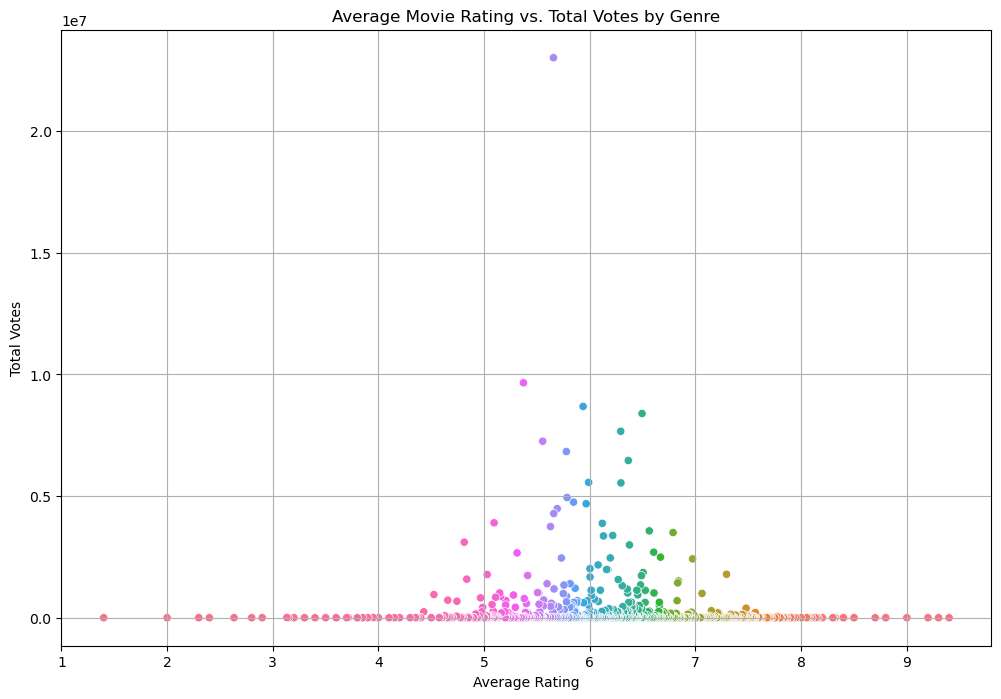

In [13]:
# Visualize the data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_genre, x='avg_rating', y='total_votes', hue='genres', legend=False)
plt.title('Average Movie Rating vs. Total Votes by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Total Votes')
plt.grid(True)
plt.show()

In [14]:
# Determine a suitable threshold for total_votes
# Looking at the scatter plot, a threshold of 10000 seems reasonable to exclude genres with very few votes.
threshold = 10000

# Filter the DataFrame based on the chosen total_votes threshold
df_filtered_genre = df_genre[df_genre['total_votes'] > threshold].copy()

# Display the filtered DataFrame
display(df_filtered_genre)

,genres,movie_id,avg_rating,total_votes
41,"Documentary,Sport,Thriller",tt6333060,7.900000,28979
55,"Biography,Documentary,Thriller",tt3640710,7.766667,49136
60,"Action,Documentary",tt1582399,7.711111,13080
62,"Animation,Drama,History",tt1725969,7.700000,10474
67,"Comedy,Documentary,Music",tt1748040,7.628571,11116
...,...,...,...,...
871,"Horror,Mystery,Romance",tt1883400,4.670000,14033
872,"Action,Horror,Sci-Fi",tt1733578,4.656250,721869
874,"Horror,Sci-Fi",tt6936264,4.626966,80489
880,"Action,Adventure,Horror",tt2300913,4.525000,952522


#### Split genres
Create a new DataFrame where each row represents a single genre from the 'genres' column of the filtered data.

In [15]:
# Split the 'genres' column by comma and stack the results
genres_split = df_filtered_genre['genres'].str.split(',').explode()

# Reset the index of the resulting Series
genres_split = genres_split.reset_index()

# Create a new DataFrame by merging the original filtered DataFrame with the split genres
df_split_genres = pd.merge(df_filtered_genre, genres_split, left_index=True, right_on='index')

# Rename the column containing the individual genres
df_split_genres = df_split_genres.rename(columns={'genres_y': 'single_genre'})

# Drop the unnecessary index column from the merge
df_split_genres = df_split_genres.drop(columns=['index', 'genres_x'])

# Display the new DataFrame
display(df_split_genres)

,movie_id,avg_rating,total_votes,single_genre
0,tt6333060,7.900000,28979,Documentary
1,tt6333060,7.900000,28979,Sport
2,tt6333060,7.900000,28979,Thriller
3,tt3640710,7.766667,49136,Biography
4,tt3640710,7.766667,49136,Documentary
...,...,...,...,...
945,tt2300913,4.525000,952522,Adventure
946,tt2300913,4.525000,952522,Horror
947,tt1331329,4.429091,243297,Action
948,tt1331329,4.429091,243297,Horror


The table above shows the average movie rating and total votes for different genre combinations. It appears that some genre combinations have very high average ratings but a very low number of votes, suggesting these ratings may not be representative due to a small sample size. To get a better understanding of the most popular and well-rated genres, we will consider both the average rating and the total number of votes.

#### Analyze individual genres
Calculate the average rating and total votes for each individual genre.

In [16]:
df_individual_genre_analysis = df_split_genres.groupby('single_genre').agg(
    avg_rating=('avg_rating', 'mean'),
    total_votes=('total_votes', 'sum')
).reset_index()

display(df_individual_genre_analysis)

,single_genre,avg_rating,total_votes
0,Action,5.838322,101045439
1,Adventure,6.066392,84157747
2,Animation,6.535836,15221323
3,Biography,6.962345,21560840
4,Comedy,6.094339,74135557
5,Crime,6.175643,39536277
6,Documentary,7.387946,4613890
7,Drama,6.395208,119380833
8,Family,6.215000,8499186
9,Fantasy,5.932535,26246881


#### Visualize individual genres
Creating visualizations to show the distribution of average ratings and total votes for individual genres.

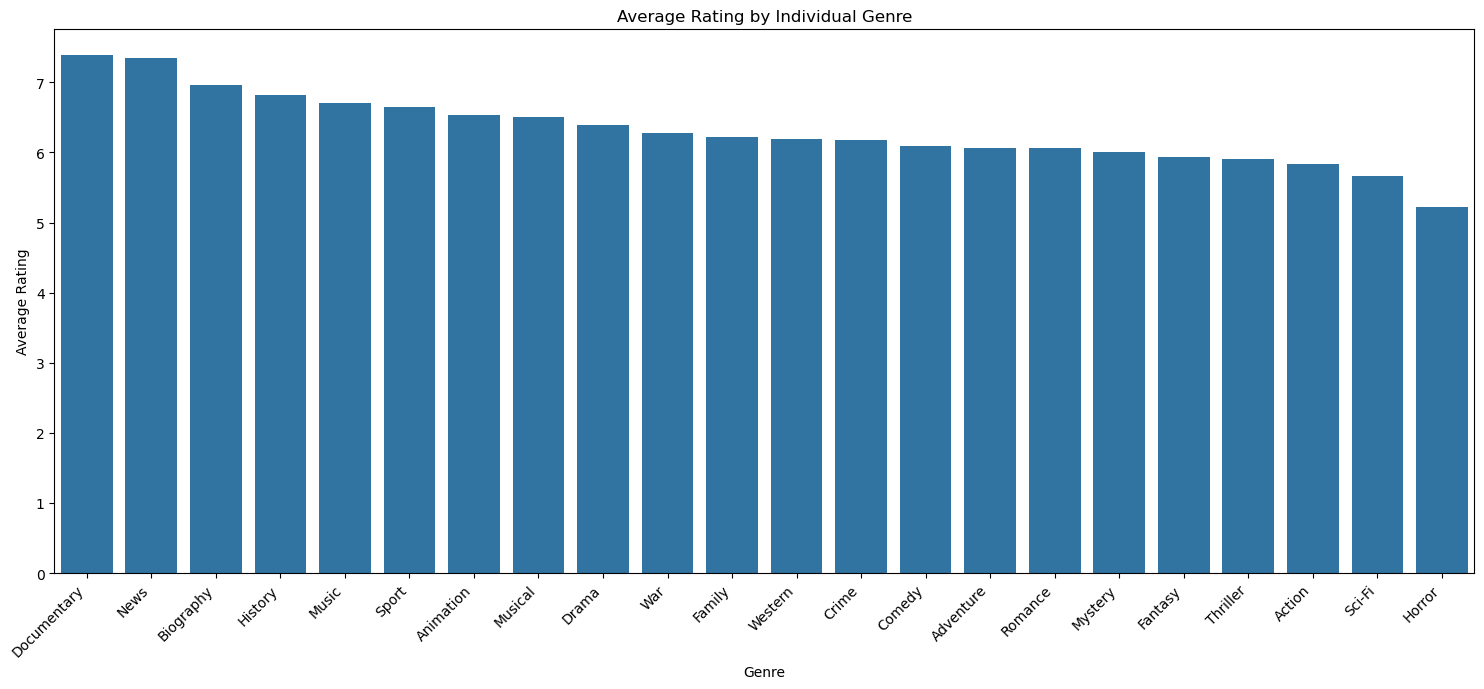

In [17]:
plt.figure(figsize=(15, 7))
sns.barplot(data=df_individual_genre_analysis.sort_values('avg_rating', ascending=False), x='single_genre', y='avg_rating')
plt.title('Average Rating by Individual Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

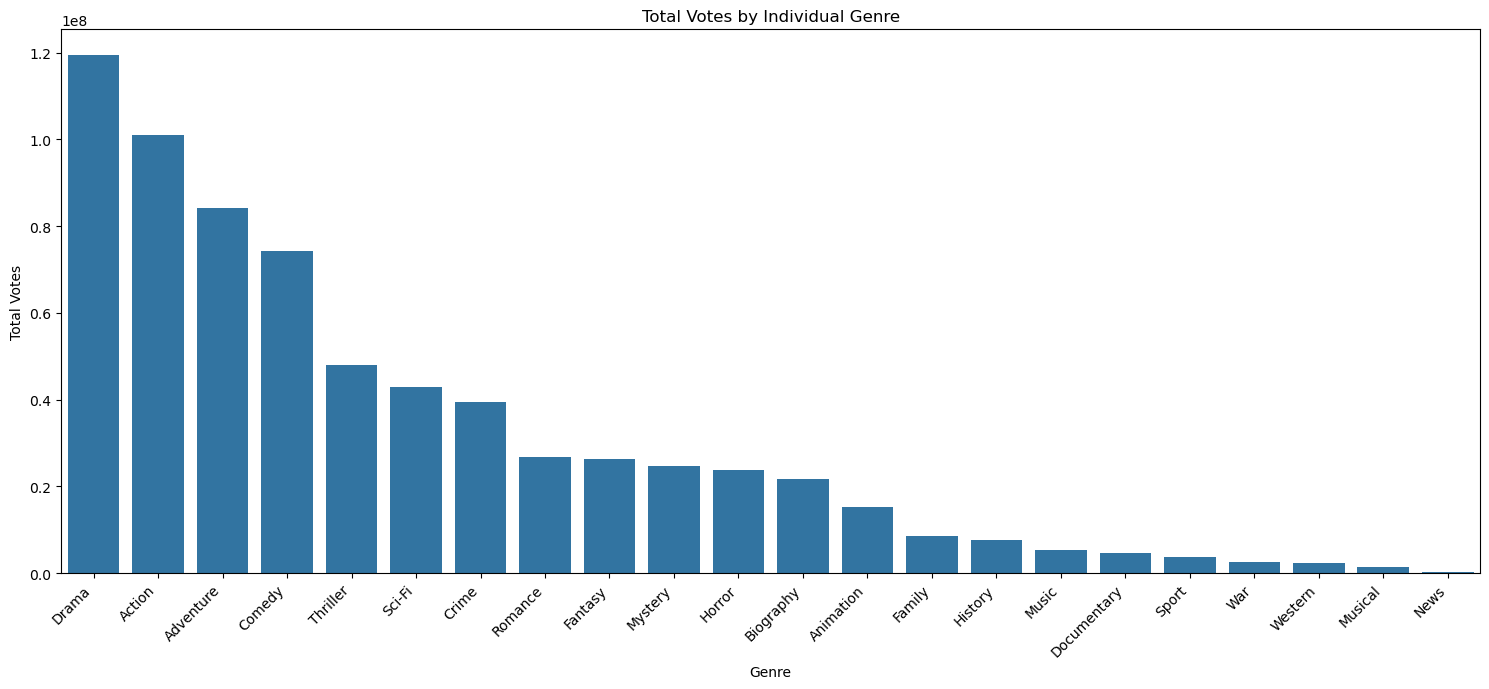

In [18]:
plt.figure(figsize=(15, 7))
sns.barplot (data=df_individual_genre_analysis.sort_values('total_votes', ascending=False), x='single_genre', y='total_votes')
plt.title('Total Votes by Individual Genre')
plt.xlabel('Genre')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Summary:
##### Data Analysis Key Findings
After filtering, the dataset contained 356 rows representing movies with more than 10,000 total votes.
The analysis calculated the average rating and total votes for each individual genre present in the filtered dataset.
Two bar plots were generated, visualizing the average rating per genre and the total votes per genre.

Looking at the "Average Rating by Individual Genre" plot and the df_individual_genre_analysis DataFrame, the genres with the highest average ratings appear to be:

Documentary: (Highest average rating) News: (Second highest average rating) Biography: History: Music: 
Most Popular Genres (by Total Votes):

Examining the "Total Votes by Individual Genre" plot and the df_individual_genre_analysis DataFrame, the genres with the most total votes are:

Drama: (Highest total votes) Action: (Second highest total votes) Adventure: Comedy: Thriller: 

Summary:
The analysis of individual genres, after filtering for movies with more than 10,000 votes, reveals a distinction between genres that are highly rated and those that are most popular in terms of the sheer number of votes. Documentaries and News tend to have the highest average ratings among individual genres, while Drama, Action, and Adventure receive the most total votes. This suggests that while some genres are critically acclaimed, others have a broader appeal and larger viewership base.

We can also note that some genres like 'Horror' have a relatively low average rating but a high number of total votes, indicating a large audience despite lower average scores. Conversely, genres like 'News' have high average ratings but significantly fewer total votes compared to the most popular genres.

This analysis highlights that focusing solely on average rating or total votes would provide an incomplete picture. A comprehensive understanding requires considering both metrics.

#### Analyze Relationship between Average Rating and Total Votes
Create a scatter plot to visualize the relationship between average rating and total votes for individual genres and calculate the correlation coefficient to quantify the strength and direction of this relationship.

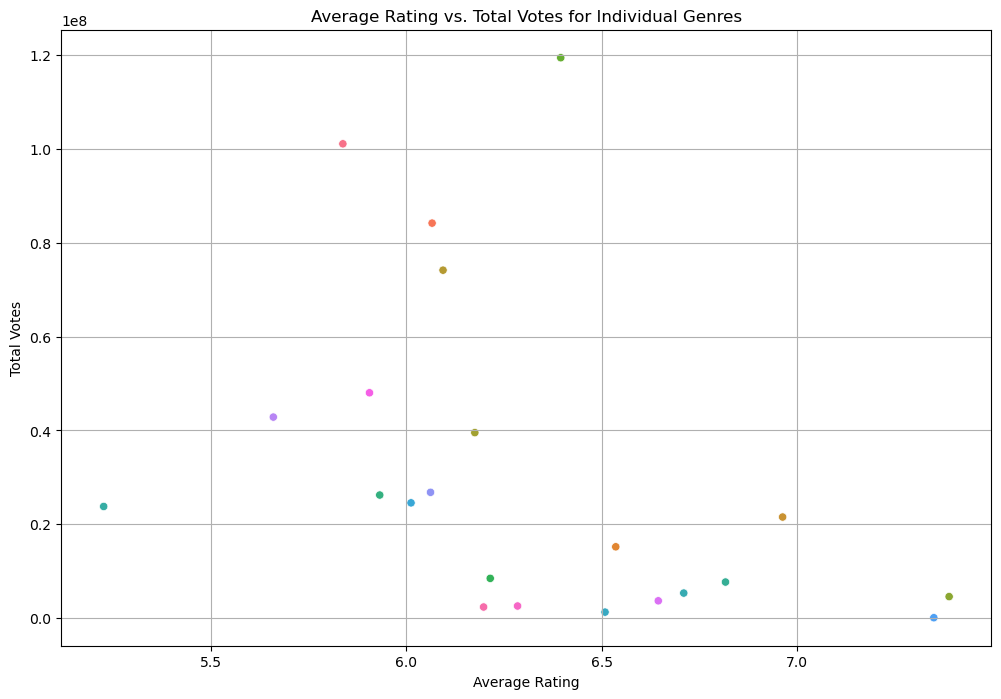

The correlation coefficient between average rating and total votes for individual genres is: -0.40


In [19]:
# Using the df_split_genres from the previous steps.

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_individual_genre_analysis, x='avg_rating', y='total_votes', hue='single_genre', legend=False)
plt.title('Average Rating vs. Total Votes for Individual Genres')
plt.xlabel('Average Rating')
plt.ylabel('Total Votes')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation = df_individual_genre_analysis['avg_rating'].corr(df_individual_genre_analysis['total_votes'])

print(f"The correlation coefficient between average rating and total votes for individual genres is: {correlation:.2f}")

The correlation coefficient of -0.40 suggests a weak negative linear relationship. In other words, there is a slight tendency for genres with higher average ratings to have fewer total votes, and vice versa. However, this relationship is not very strong, as indicated by the value being closer to 0 than to -1.
Data Analysis Key Findings
The analysis focused on individual genres with at least 500 movies.
The top-rated genres (highest average rating) are War, History, and Western.
The most popular genres (highest total votes) are Drama, Comedy, and Action.

## Objective 2: Is there a relationship between the production budget and revenue in worldwide gross?

#### Step 1: Loading the Data
Load the tn.movie_budgets.csv file into a pandas DataFrame.

In [20]:
df2 = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")        
df2.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
#check for missing values
df2.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [22]:
# Checking for data types
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Step 2: Data Cleaning and Preprocessing
The production_budget and worldwide_gross columns are currently stored as strings with dollar signs and commas, which prevents them from being used in numerical calculations. This step converts these columns to a numerical format (integers) for analysis.

In [23]:
#Convert the data type to float
df2["production_budget"] = pd.to_numeric(
    df2["production_budget"].replace({r'\$': '', ',': ''}, regex=True),
    errors="coerce"
)

In [24]:
#Convert the data type to float
df2["worldwide_gross"] = pd.to_numeric(
    df2["worldwide_gross"].replace({r'\$': '', ',': ''}, regex=True),
    errors="coerce"
)

In [25]:
#Convert the data type to float
df2["domestic_gross"] = pd.to_numeric(
    df2["domestic_gross"].replace({r'\$': '', ',': ''}, regex=True),
    errors="coerce"
)

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


#### Step 3: Exploratory Data Analysis (EDA)
Here, we will analyze the relationship between the production_budget and worldwide_gross using a scatter plot and a correlation coefficient. The scatter plot helps visualize the relationship, while the correlation coefficient provides a quantitative measure.

In [27]:
# Compute correlation
correlation = df2["production_budget"].corr(df2["worldwide_gross"])
print("Correlation between production budget and worldwide gross:", correlation)

Correlation between production budget and worldwide gross: 0.7483059765694761


#### Strong positive relationship – as the production budget increases, the worldwide gross tends to increase as well.

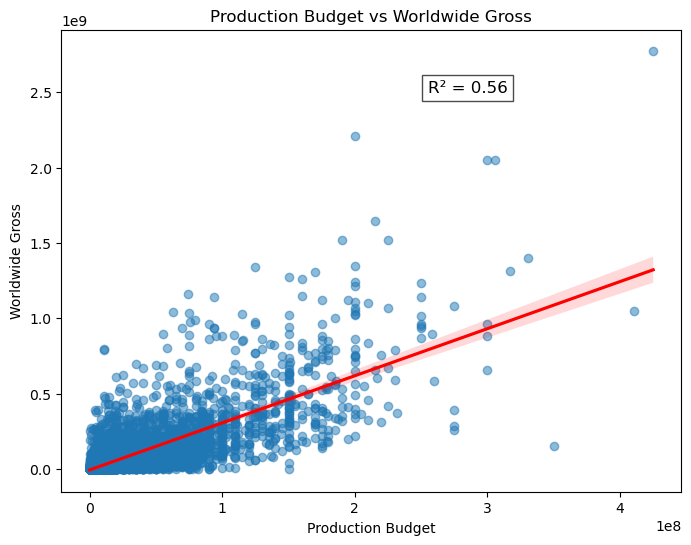

In [28]:
r_squared = correlation**2
plt.figure(figsize=(8,6))
sns.regplot(
    data=df2,
    x="production_budget",
    y="worldwide_gross",
    scatter_kws={"alpha":0.5},
    line_kws={"color":"red"}
)

# Add R² value as text on the plot
plt.text(
    x=df2["production_budget"].max()*0.6,   # position X
    y=df2["worldwide_gross"].max()*0.9,     # position Y
    s=f"R² = {r_squared:.2f}",
    fontsize=12,
    color="black",
    bbox=dict(facecolor="white", alpha=0.7)  # add background box
)

plt.title("Production Budget vs Worldwide Gross")
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross")
plt.show()

#### Key Findings 
Positive slope of the red line → as production budget increases, worldwide gross tends to increase.

Clustering near the line → strong correlation (confirmed by your r = 0.7483).

Scatter (variance) → not all movies with big budgets make big grosses. Some may underperform, and a few low-budget films may outperform expectations.

Outliers → if you see points far above/below the line, those represent unusually successful or unsuccessful films compared to their budgets.

#### R- Squared Interpretation
56% of the variation in worldwide grosses can be explained by differences in production budgets.

The other 44% is due to other factors (marketing, distribution, timing, reviews, genre, star power, etc.).

Strong positive relationship → big-budget films tend to perform well, but success is not guaranteed.

In [29]:
# Define predictor (X) and response (y)
X = df2["production_budget"]
y = df2["worldwide_gross"]

# Add constant (intercept) to the model
X = sm.add_constant(X)

# Fit linear regression model
model = sm.OLS(y, X).fit()

# Show summary of results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.560
Method:                 Least Squares   F-statistic:                     7355.
Date:                Sun, 14 Sep 2025   Prob (F-statistic):               0.00
Time:                        11:01:54   Log-Likelihood:            -1.1557e+05
No. Observations:                5782   AIC:                         2.311e+05
Df Residuals:                    5780   BIC:                         2.311e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.286e+06   1.91e+0

#### Analysis and Recommendations
Based on the analysis, a strong positive correlation exists between a movie's production budget and its worldwide gross revenue. The correlation coefficient of approximately 0.74 suggests that as the production budget increases, the worldwide gross revenue also tends to increase. However, it's important to note that correlation does not imply causation. A higher budget doesn't guarantee a blockbuster, as other factors such as marketing, cast, and audience reception play significant roles.

### Objective 3: Which original languages are more popular in screening in box office?

#### Step 1: Data Preparation and Merging
The analysis begins by loading two datasets: tmdb.movies.csv (which contains original language information) and bom.movie_gross.csv (which contains box office data). The data from both files is then merged on the title column to combine language and gross revenue information for each movie.

In [30]:
# Clean the 'title' column in `bom_df` to remove the year in parentheses for better merging.
df1['title'] = df1['title'].apply(lambda x: re.sub(r' \(\d{4}\)', '', x))

In [31]:
# Clean the 'foreign_gross' column in `df1` to a numeric type.
df1['foreign_gross'] = df1['foreign_gross'].str.replace(',', '', regex=False).astype(float)

# Merge the two DataFrames on the 'title' column.
merged_df = pd.merge(df1, df3, on='title', how='inner')

# Create a new column for worldwide gross by summing domestic and foreign gross.
merged_df['worldwide_gross'] = merged_df['domestic_gross'].fillna(0) + merged_df['foreign_gross'].fillna(0)

# Display the first few rows of the merged data.
merged_df.head()

,title,studio,domestic_gross,foreign_gross,year,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,1.067000e+09
1,Alice in Wonderland,BV,334200000.0,691300000.0,2010,11,"[10751, 14, 12]",12155,en,Alice in Wonderland,22.020,2010-03-05,6.6,8713,1.025500e+09
2,Alice in Wonderland,BV,334200000.0,691300000.0,2010,2081,[],423971,en,Alice in Wonderland,0.600,2010-01-01,6.0,1,1.025500e+09
3,Inception,WB,292600000.0,535700000.0,2010,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,38,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,7.526000e+08


In [32]:
# Checking its structure.
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3027 non-null   object 
 1   studio             3026 non-null   object 
 2   domestic_gross     3005 non-null   float64
 3   foreign_gross      1930 non-null   float64
 4   year               3027 non-null   int64  
 5   Unnamed: 0         3027 non-null   int64  
 6   genre_ids          3027 non-null   object 
 7   id                 3027 non-null   int64  
 8   original_language  3027 non-null   object 
 9   original_title     3027 non-null   object 
 10  popularity         3027 non-null   float64
 11  release_date       3027 non-null   object 
 12  vote_average       3027 non-null   float64
 13  vote_count         3027 non-null   int64  
 14  worldwide_gross    3027 non-null   float64
dtypes: float64(5), int64(4), object(6)
memory usage: 354.9+ KB


#### Step 2: Analysis and Visualization
After preparing the data, we can now analyze which original languages have generated the most revenue in the box office. We'll group the data by original_language and sum the worldwide_gross for each language. The results will then be visualized using a bar chart.

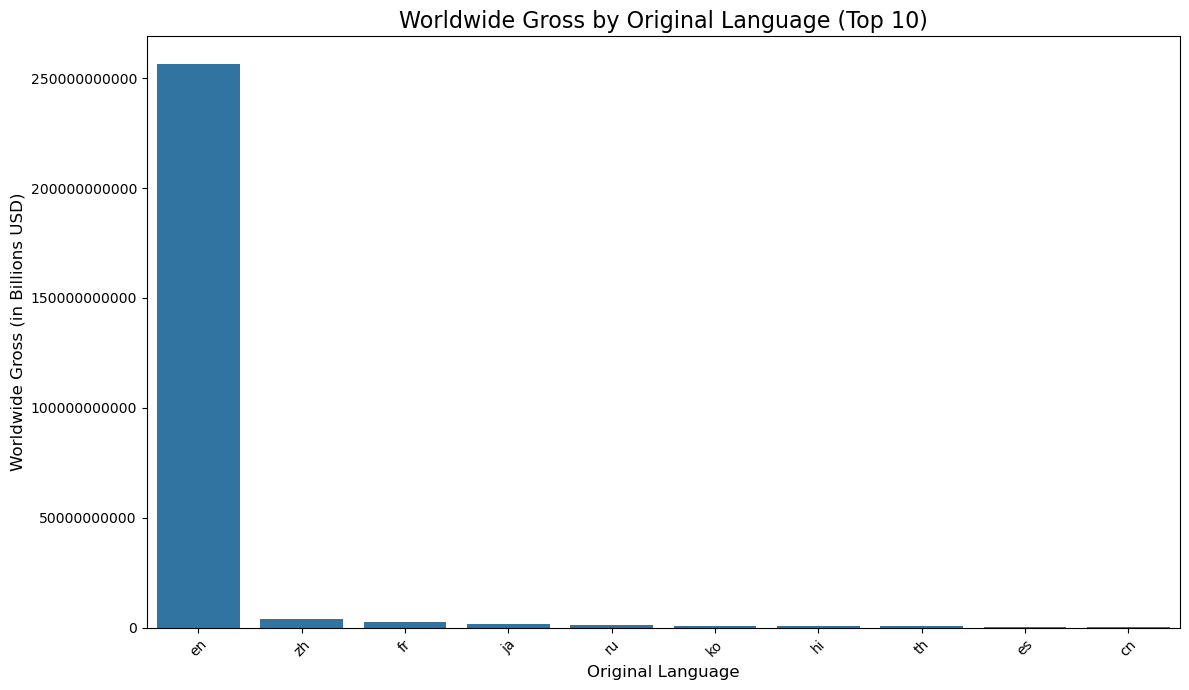

In [33]:
# Group by original_language and sum worldwide gross
language_gross = merged_df.groupby('original_language')['worldwide_gross'].sum().sort_values(ascending=False)

# Create a DataFrame from the grouped series for easier plotting
language_gross_df = language_gross.head(10).reset_index()
language_gross_df.columns = ['original_language', 'worldwide_gross']

# Create the bar chart to visualize the results
plt.figure(figsize=(12, 7))
sns.barplot(x='original_language', y='worldwide_gross', data=language_gross_df)
plt.title('Worldwide Gross by Original Language (Top 10)', fontsize=16)
plt.xlabel('Original Language', fontsize=12)
plt.ylabel('Worldwide Gross (in Billions USD)', fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Results 
The bar chart shows a clear dominance of English (en) language films in terms of worldwide box office gross.

Summary of findings:

English Language Dominance: English-language films, primarily from the United States, account for a vast majority of the total worldwide gross revenue in the dataset. This is expected, given the prominence of the Hollywood film industry.

Other Popular Languages: Languages like Chinese (zh), French (fr), and Japanese (ja) also have a significant presence, demonstrating the success of non-English films in the global market.

Cultural Market Influence: The strong performance of languages like Chinese and Japanese is indicative of large domestic markets that contribute significantly to the worldwide gross. This underscores the importance of regional markets in addition to global distribution.

#### Recommendation
Based on this analysis we can recommend that movies be produced in English as it is the dominant/popular original language in the box office market worldwide.

## Conclusion and Business Recommendations
##### 1.Prioritize Documentaries and Drama films
The analysis shows that Drama dominates in audience votes, making it the most popular genre.
However, Documentaries lead in ratings, showing they resonate more deeply with critics or dedicated viewers.
Therefore, a dual approach is advisable: leverage Drama for broad audience engagement while investing in Documentaries to strengthen brand reputation and quality perception.
This strategic mix would maximize both commercial returns and critical recognition, ensuring long-term success for the company.

##### 2. Invest in a Higher Production Budget
There is a positive relationship between a film's production budget and its worldwide gross revenue. To increase the potential for a high return on investment, the new venture should consider allocating a higher budget to its film productions. However, it is important to note that a high budget does not guarantee success, as some high-budget films underperform, and some low-budget films exceed expectations.

##### 3. Produce Films in English
The analysis found that English is the dominant and most popular original language for films in the worldwide box office market. To maximize the film’s potential reach and commercial success, the studio should prioritize producing movies in English.

